###### Importing required libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
import numpy as np
from datetime import datetime

###### Sampling 1 million data points

###### importing the sampled data 

In [2]:
train_df = pd.read_csv('q2train.csv')
train_df.describe()

,X_1,X_2,error,Y
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,3.001920,-1.002969,0.000988,3.996970
std,1.999661,1.999670,1.414039,4.687888
min,-7.362117,-11.048858,-6.718731,-17.936119
25%,1.653318,-2.352003,-0.954292,0.832440
50%,3.000204,-1.002240,-0.000541,3.994005
75%,4.351186,0.344908,0.954976,7.157533
max,12.266605,8.495347,6.786142,27.296368


###### Plotting the data points on a 3D plane

In [3]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# x_1 = train_df["X_1"]
# x_2 = train_df["X_2"]
# y = train_df["Y"]
# ax.scatter(x_1, x_2, y, marker='o')

# ax.set_xlabel('x_1')
# ax.set_ylabel('x_2')
# ax.set_zlabel('y')

# plt.show()

##### Stochastic Gradient Descent

In [4]:
eta = 0.001

sliding_win_size = 10
gamma = 3

theta = np.zeros((3,1))

gamma_count = 0
m = train_df["X_1"].count()
r = 1000000

phi = 0.000001

print("Learning rate: ", eta)
print("Batch size: ", r)

Learning rate:  0.001
Batch size:  1000000


###### Stopping criterion

In [5]:
def convergence(J_theta_mov_avg_t_1,J_theta_mov_avg_t, gamma):
    global gamma_count
    global phi

    # print("converge criteria ",abs(J_theta_mov_avg_t_1 - J_theta_mov_avg_t))
    # print("limit: ",phi)
    if abs(J_theta_mov_avg_t_1 - J_theta_mov_avg_t) < phi:
        gamma_count += 1
    else:
        gamma_count = 0
    if gamma_count >= gamma:
        return True
    else:
        return False

###### Algorithm

In [6]:
# For plotting purpose
theta_and_J_theta = []

###### Shuffling the rows to create uniform batches

In [7]:
train_sdf = train_df.sample(frac = 1)
curr_block = 0

###### Vector Notation

In [8]:
# X = np.hstack(np.array(train_df["X_1"]), np.array(train_df["X_2"]))
a = np.array(train_sdf["X_1"], ndmin=2)
b = np.array(train_sdf["X_2"], ndmin=2)
c = np.ones((m,1))
X = np.hstack((c,a.T,b.T))
print("Shape of X is ",X.shape)
print(X)

Shape of X is  (1000000, 3)
[[ 1.          5.44783409 -0.36102535]
 [ 1.          3.83119216 -2.27782221]
 [ 1.         -0.20925251 -1.51625447]
 ...
 [ 1.          4.32553027 -4.13900058]
 [ 1.          1.12212276 -2.91522608]
 [ 1.          2.94265981 -1.10346303]]


In [9]:
Y = np.array(train_sdf["Y"])
Y.resize(m,1)
print("Shape of Y is ",Y.shape)
print(Y)

Shape of Y is  (1000000, 1)
[[ 8.86977385]
 [ 1.80740912]
 [ 0.99056358]
 ...
 [-1.6605508 ]
 [-3.35761501]
 [ 3.45998133]]


In [10]:
count_iterations = 1
J_theta_mov_avg_t = 0
J_theta_mov_avg_t_1 = 0

start = datetime.now()
while(True):
    X_b = X[curr_block*r:(curr_block+1)*r]
    Y_b = Y[curr_block*r:(curr_block+1)*r]
    
    H_theta = np.matmul(X_b,theta)
    
    J_theta = np.matmul((Y_b - H_theta).T, (Y_b - H_theta)).sum()/(2*r)
    
    grad_J_theta = np.array(((Y_b - H_theta)*(-1)*X_b).sum(axis=0)/r, ndmin=2)
    grad_J_theta = grad_J_theta.T
    
    # print("theta ",theta[0][0], theta[1][0], theta[2][0])
    # print("loss ", J_theta)
    
    theta_and_J_theta.append((theta[0][0], theta[1][0], theta[2][0], J_theta))
    
    # No converge check in first "sliding window" phase
    if count_iterations <= sliding_win_size:
        J_theta_mov_avg_t += J_theta
        if count_iterations == sliding_win_size:
            J_theta_mov_avg_t /= sliding_win_size
    
    # Moving average for the first time
    if count_iterations == sliding_win_size+1:
        J_theta_mov_avg_t_1 = (J_theta_mov_avg_t*(sliding_win_size-1)+ J_theta)/(sliding_win_size)
    
    # Convergence after "sliding window + 1" iterations
    if count_iterations > sliding_win_size+1:
        J_theta_mov_avg_t = J_theta_mov_avg_t_1
        J_theta_mov_avg_t_1 = (J_theta_mov_avg_t*(sliding_win_size-1)+ J_theta)/(sliding_win_size)
        if convergence(J_theta_mov_avg_t_1,J_theta_mov_avg_t, gamma):
            break
    
    theta = theta - (eta*grad_J_theta)
    
    curr_block = (curr_block+1)%(m//r)
    
    count_iterations += 1
    if(count_iterations%3000==0):
        print(str(count_iterations)+" Iterations over ,"+"theta = ",theta.T)
    
end = datetime.now()
td = (end - start).total_seconds() * (10**3)

3000 Iterations over ,theta =  [[1.76953219 1.26879081 1.91028187]]
6000 Iterations over ,theta =  [[2.45637179 1.11877277 1.96029964]]
9000 Iterations over ,theta =  [[2.76070615 1.05229882 1.98245655]]


###### Loss curve

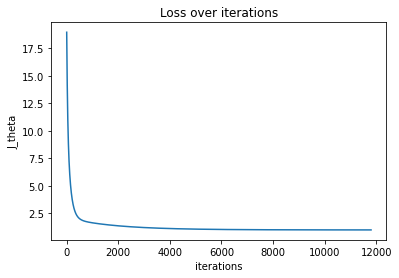

In [11]:
zs = [theta_and_J_theta[i][3] for i in range(len(theta_and_J_theta))]
t = [i for i in range(len(theta_and_J_theta))]
fig2 = plt.figure()
plt.plot(t,zs)
plt.title("Loss over iterations")
plt.ylabel("J_theta")
plt.xlabel("iterations")
plt.show()

###### Final Theta values

In [12]:
print("Theta: ",theta)

Theta:  [[2.88963331]
 [1.02413802]
 [1.99184302]]


###### Number of iterations

In [13]:
print("count iterations: ", count_iterations)

count iterations:  11802


###### Time Taken

In [14]:
print(f"The time of execution of above program is {td:.03f} ms")

The time of execution of above program is 916911.383 ms


In [15]:
# Loop implementation (not the vector implementation)

# while(True):
#     J_theta = 0.0
#     grad_J_theta = np.array([0.0,0.0,0.0])
    
#     for j in range(r):
#         i = curr_block*r+j
#         x_1i, x_2i, yi = train_sdf["X_1"][i], train_sdf["X_2"][i], train_sdf["Y"][i] 
#         h_theta_xi = theta[0] + theta[1]*x_1i + theta[2]*x_2i
#         J_theta += ((yi - h_theta_xi)**2)
#         grad_J_theta += (yi - h_theta_xi)*(-1)*np.array([1.0, x_1i, x_2i])
        
#     J_theta /= (2*r)
#     grad_J_theta /= r
    
#     print("curr block - loss: ",curr_block,J_theta)
#     print("theta = ",theta)

#     #Storing theta and its corresponding J_theta for every iteration
#     theta_and_J_theta.append((theta[0], theta[1], theta[2], J_theta))
    
#     #Stopping criteria
#     if convergence(grad_J_theta):
#         break
    
#     #Updating parameters
#     theta = theta - (eta*grad_J_theta)
    
#     #Go to next block
#     curr_block = (curr_block+1)%(m//r)

###### Reading test data from file 

In [16]:
test_df = pd.read_csv('/home/tkarthikeyan/IIT Delhi/COL774-Machine Learning/Assignment 1/ass1_data/data/q2/q2test.csv')

###### Describing the dataframe

In [17]:
test_df.describe()

,X_1,X_2,Y
count,10000.000000,10000.000000,10000.000000
mean,1.177548,-1.083901,2.015905
std,10.003417,10.037702,22.447849
min,-34.302000,-44.929000,-86.309000
25%,-5.545000,-7.788750,-13.087500
50%,1.139500,-1.163500,2.087000
75%,7.972750,5.499500,16.907000
max,40.044000,35.402000,81.121000


In [18]:
test_df

,X_1,X_2,Y
0,16.678,13.018,45.537
1,6.583,-5.539,-1.170
2,-19.837,6.089,-3.646
3,-8.412,6.110,8.137
4,1.052,11.595,25.781
...,...,...,...
9995,-1.476,16.595,31.906
9996,0.203,26.920,58.418
9997,6.381,2.484,13.018
9998,3.138,-5.425,-6.873


###### Test data in the vector form

In [19]:
n = len(test_df["X_1"])
at = np.array(test_df["X_1"], ndmin=2)
bt = np.array(test_df["X_2"], ndmin=2)
ct = np.ones((n,1))
Xtest = np.hstack((ct,at.T,bt.T))
Ytest = np.array(test_df["Y"], ndmin=2)
print(Xtest)

[[  1.     16.678  13.018]
 [  1.      6.583  -5.539]
 [  1.    -19.837   6.089]
 ...
 [  1.      6.381   2.484]
 [  1.      3.138  -5.425]
 [  1.      5.502  -8.332]]


###### Computing the Mean Square error with test data

In [20]:
H_theta = Ytest.T - np.matmul(Xtest,theta)
(1/n)*np.matmul(H_theta.T,H_theta)

array([[2.03702316]])

###### Final Theta values

In [21]:
theta

array([[2.88963331],
       [1.02413802],
       [1.99184302]])

###### Computing the Mean Square error with original hypothesis

In [22]:
theta = np.array([[3],[1],[2]])

In [23]:
H_theta = Ytest.T - np.matmul(Xtest,theta)
(1/n)*np.matmul(H_theta.T,H_theta)

array([[1.96589384]])

###### Movement of theta over time

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


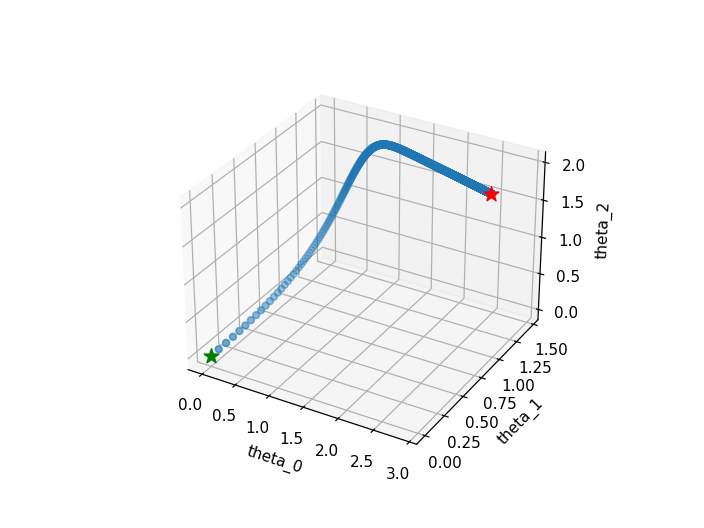

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = [theta_and_J_theta[i][0] for i in range(0,len(theta_and_J_theta),5)]
ys = [theta_and_J_theta[i][1] for i in range(0,len(theta_and_J_theta),5)]
zs = [theta_and_J_theta[i][2] for i in range(0,len(theta_and_J_theta),5)]
ax.scatter(xs[1:-1], ys[1:-1], zs[1:-1], marker='o')
ax.scatter(xs[-1], ys[-1], zs[-1], marker='*',s=100, color="red")
ax.scatter(xs[0], ys[0], zs[0], marker='*',s=100,color="green")

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('theta_2')
plt.savefig("3d_plot_"+str(r)+".png")
plt.show()